bond 개수 : 4n / 2 = 2n

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 36
N = L**2

ptr = np.empty(N, int)  # 각 스핀의 부모 포인터 배열

big_list = []  # 각 반복마다의 가장 큰 클러스터 크기를 저장할 리스트

# Union-Find 알고리즘의 find 함수 정의
def find(i):
    if ptr[i] < 0:
        return i  # 자기 자신이 root인 경우
    else:
        ptr[i] = find(ptr[i])  # 경로 압축
        return ptr[i]

# Union-Find 알고리즘의 union 함수 정의
def union(r1, r2, big):
    if r2 != r1:
        if ptr[r1] > ptr[r2]:  # 두 번째 트리가 더 큰 경우
            ptr[r2] += ptr[r1]  # 첫 번째 트리를 병합
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
        if -ptr[r1] > big:  # 기존의 big보다 큰 경우 갱신
            big = -ptr[r1]
    big_list.append(big / N)  # 현재의 가장 큰 클러스터 크기를 N으로 나눈 값을 리스트에 추가
    return r1, r2, big

big = 0
bonds = []

# 가장 가까운 이웃들 간의 본드 초기화
for i in range(L):
    for j in range(L):
        current = i * L + j
        right = i * L + (j + 1) % L
        down = ((i + 1) % L) * L + j
        bonds.append((current, right))
        bonds.append((current, down))

np.random.shuffle(bonds)  # 본드를 무작위로 섞음

print(bonds)  # 섞인 본드 출력 (디버깅용)

for i in range(L**2):
    ptr[i] = -1  # 각 스핀의 초기 부모 포인터 설정

print(np.shape(bonds))  # 본드의 모양 출력 (디버깅용)

# Union-Find 알고리즘을 이용하여 클러스터 크기 계산
for bond in bonds:
    s1, s2 = bond
    r1, r2 = find(s1), find(s2)
    r1, r2, big = union(r1, r2, big)

print(np.shape(big_list))  # 각 반복마다의 가장 큰 클러스터 크기를 저장한 리스트의 모양 출력 (디버깅용)


[(1009, 1045), (1272, 12), (803, 804), (566, 602), (461, 462), (16, 17), (852, 888), (1027, 1063), (15, 16), (128, 164), (1012, 1048), (930, 966), (964, 1000), (1257, 1258), (579, 615), (332, 368), (587, 623), (859, 895), (0, 1), (696, 697), (200, 201), (123, 124), (998, 1034), (564, 600), (917, 918), (711, 747), (1200, 1201), (1177, 1178), (66, 67), (729, 730), (1248, 1249), (580, 616), (123, 159), (803, 839), (885, 886), (812, 848), (106, 107), (1227, 1263), (954, 990), (1187, 1223), (1091, 1092), (1271, 11), (1193, 1229), (1176, 1212), (603, 604), (818, 854), (752, 753), (572, 573), (850, 851), (654, 690), (668, 669), (1146, 1182), (398, 399), (774, 775), (242, 278), (1265, 1266), (650, 686), (314, 350), (385, 421), (781, 817), (942, 943), (553, 589), (266, 302), (806, 807), (126, 162), (442, 443), (465, 466), (183, 219), (81, 117), (887, 888), (501, 502), (1173, 1174), (482, 518), (387, 423), (972, 973), (144, 145), (1023, 1024), (177, 178), (798, 834), (1186, 1222), (211, 212), (3

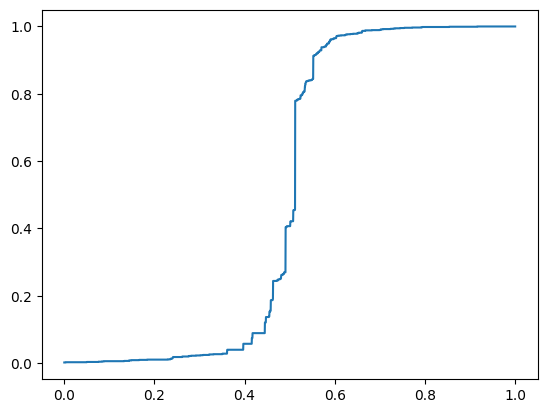

In [ ]:

xlist = [(i+1)/(2*N) for i in range(2*N)]

plt.plot(xlist,big_list)
plt.show()